In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima

curr = Path.cwd() 
path = curr.parent.parent.parent
file = str(path)
file+="/data_cleanup/first_dataset/cleaned_data.csv"
print(file)

/Users/dzanijaivan/Developer/hotel_occupancy/lumen/data_cleanup/first_dataset/cleaned_data.csv


In [4]:
df = pd.read_csv(file)
df.head()

,Unnamed: 0,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,broj_nocenja,ukupno_placeno
0,0,0,2015-07-01,2015-01-21,2015-07-01,NaN,2,0.0,PRT,0,0,100.000000,Check-Out,1313223,1077152,1.0,100.000000
1,1,0,2015-07-01,2015-06-10,2015-07-01,NaN,2,0.0,PRT,0,0,100.000000,Check-Out,1313224,1017906,1.0,100.000000
2,2,0,2015-07-01,2015-05-13,2015-07-02,NaN,1,0.0,GBR,0,1,64.991345,Check-Out,1313225,1039896,1.0,64.991345
3,3,0,2015-07-01,2014-05-30,2015-07-02,NaN,1,0.0,GBR,1,1,74.368897,Check-Out,1313226,1008245,1.0,74.368897
4,4,0,2015-07-01,2014-07-06,2015-07-03,NaN,2,0.0,GBR,2,1,130.973278,Check-Out,1313227,1093703,2.0,261.946557


In [5]:
df = df[df["status_rezervacije"] == "Check-Out"]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 74414 entries, 0 to 93961
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     74414 non-null  int64  
 1   hotel_id                       74414 non-null  int64  
 2   datum_dolaska                  74414 non-null  object 
 3   datum_kreiranja_rezervacije    74414 non-null  object 
 4   datum_odjave                   74414 non-null  object 
 5   datum_otkazivanja_rezervacije  0 non-null      object 
 6   broj_odraslih_gostiju          74414 non-null  int64  
 7   broj_djece_gostiju             74414 non-null  float64
 8   zemlja_gosta                   74414 non-null  object 
 9   kanal_prodaje_id               74414 non-null  int64  
 10  tip_sobe_id                    74414 non-null  int64  
 11  cijena_nocenja                 74414 non-null  float64
 12  status_rezervacije             74414 non-null  obje

,Unnamed: 0,hotel_id,datum_dolaska,datum_kreiranja_rezervacije,datum_odjave,datum_otkazivanja_rezervacije,broj_odraslih_gostiju,broj_djece_gostiju,zemlja_gosta,kanal_prodaje_id,tip_sobe_id,cijena_nocenja,status_rezervacije,rezervacija_id,gost_id,broj_nocenja,ukupno_placeno
0,0,0,2015-07-01,2015-01-21,2015-07-01,NaN,2,0.0,PRT,0,0,100.000000,Check-Out,1313223,1077152,1.0,100.000000
1,1,0,2015-07-01,2015-06-10,2015-07-01,NaN,2,0.0,PRT,0,0,100.000000,Check-Out,1313224,1017906,1.0,100.000000
2,2,0,2015-07-01,2015-05-13,2015-07-02,NaN,1,0.0,GBR,0,1,64.991345,Check-Out,1313225,1039896,1.0,64.991345
3,3,0,2015-07-01,2014-05-30,2015-07-02,NaN,1,0.0,GBR,1,1,74.368897,Check-Out,1313226,1008245,1.0,74.368897
4,4,0,2015-07-01,2014-07-06,2015-07-03,NaN,2,0.0,GBR,2,1,130.973278,Check-Out,1313227,1093703,2.0,261.946557


In [6]:
df['datum_dolaska'] = pd.to_datetime(df['datum_dolaska'])
df['datum_kreiranja_rezervacije'] = pd.to_datetime(df['datum_kreiranja_rezervacije'])
df['datum_otkazivanja_rezervacije'] = pd.to_datetime(df['datum_otkazivanja_rezervacije'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74414 entries, 0 to 93961
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Unnamed: 0                     74414 non-null  int64         
 1   hotel_id                       74414 non-null  int64         
 2   datum_dolaska                  74414 non-null  datetime64[ns]
 3   datum_kreiranja_rezervacije    74414 non-null  datetime64[ns]
 4   datum_odjave                   74414 non-null  object        
 5   datum_otkazivanja_rezervacije  0 non-null      datetime64[ns]
 6   broj_odraslih_gostiju          74414 non-null  int64         
 7   broj_djece_gostiju             74414 non-null  float64       
 8   zemlja_gosta                   74414 non-null  object        
 9   kanal_prodaje_id               74414 non-null  int64         
 10  tip_sobe_id                    74414 non-null  int64         
 11  cijena_nocenja      

In [7]:
df['ukupan_broj_gostiju'] = df['broj_odraslih_gostiju'] + df['broj_djece_gostiju']
occupancy = df[(df['datum_otkazivanja_rezervacije'].isna())]
occupancy['datum_dolaska'] = pd.to_datetime(occupancy['datum_dolaska'])
occupancy['datum_odjave'] = pd.to_datetime(occupancy['datum_odjave'])
#print(occupancy)

# Za svaku rezervaciju generiranje svih datuma boravka
dates = []
for index, row in occupancy.iterrows():
    delta = (row['datum_odjave'] - row['datum_dolaska']).days
    for i in range(delta):
        dates.append((row['datum_dolaska'] + pd.Timedelta(days=i), row['ukupan_broj_gostiju']))

# Pretvaranje u DataFrame
dates_df = pd.DataFrame(dates, columns=['datum', 'broj_gostiju'])

# Grupiranje po datumu i sumiranje broja gostiju
final_df = dates_df.groupby('datum')['broj_gostiju'].sum().reset_index()
final_df.head()

,datum,broj_gostiju
0,2015-01-01,10.0
1,2015-01-02,16.0
2,2015-01-03,19.0
3,2015-01-04,24.0
4,2015-01-05,25.0


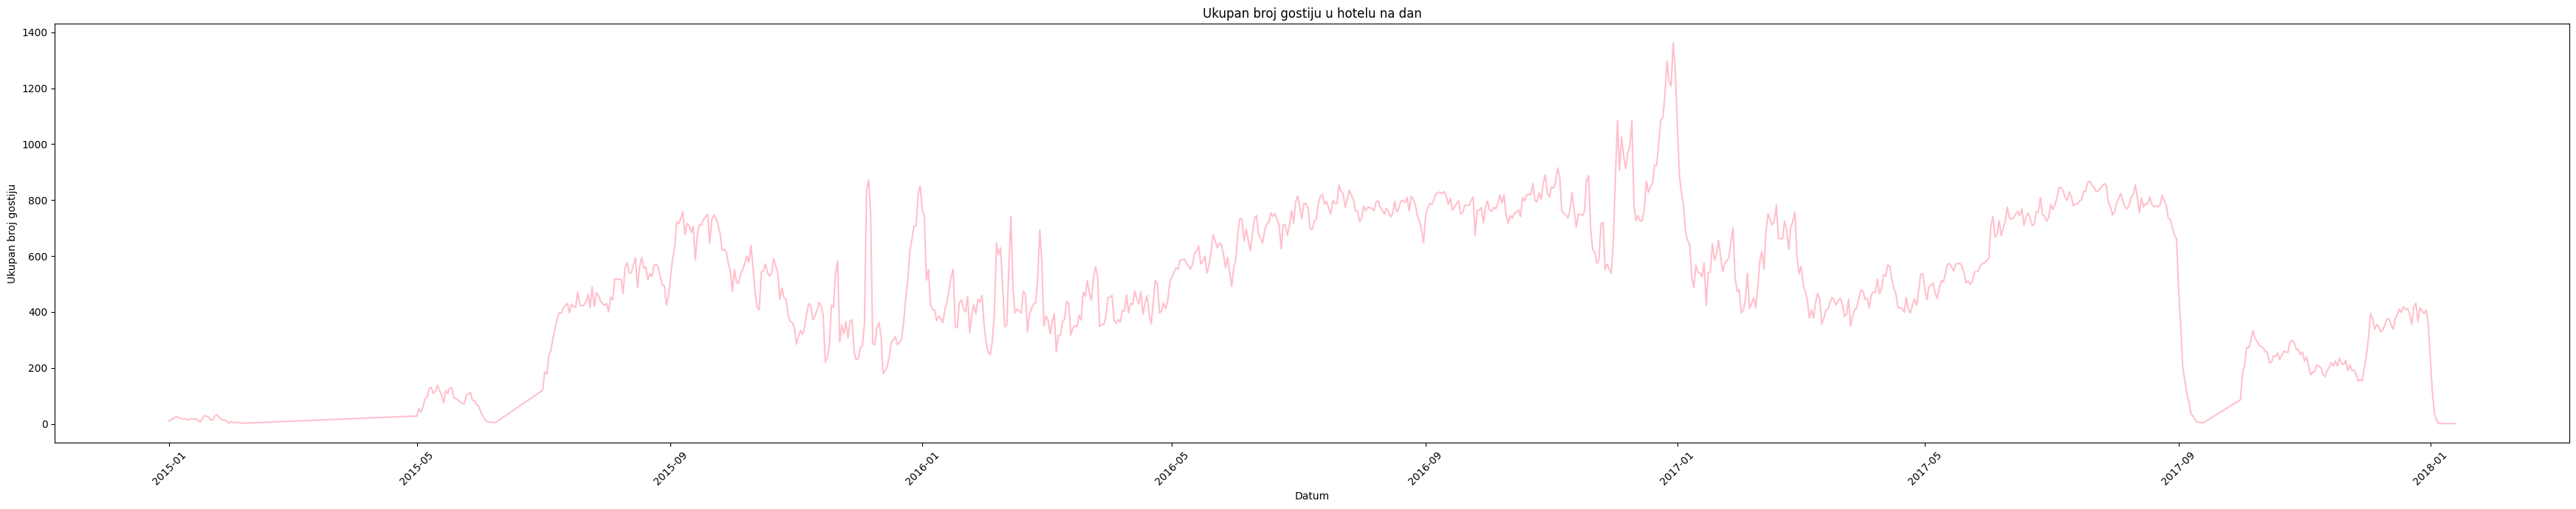

In [8]:
plt.figure(figsize=(35, 7))  # Prilagodite veličinu prema potrebi
plt.plot(final_df['datum'], final_df['broj_gostiju'], color='pink')
plt.title('Ukupan broj gostiju u hotelu na dan')
plt.xlabel('Datum')
plt.ylabel('Ukupan broj gostiju')
plt.xticks(rotation=45)  # Rotira oznake na x-osi za bolju čitljivost
plt.tight_layout()  # Prilagodba layouta za sprečavanje preklapanja
plt.show()

                datum  broj_gostiju
datum                              
2015-08-30 2015-08-30         425.0
2015-08-31 2015-08-31         457.0
2015-09-01 2015-09-01         523.0
2015-09-02 2015-09-02         590.0
2015-09-03 2015-09-03         629.0


Text(0.5, 1.0, 'DF2')

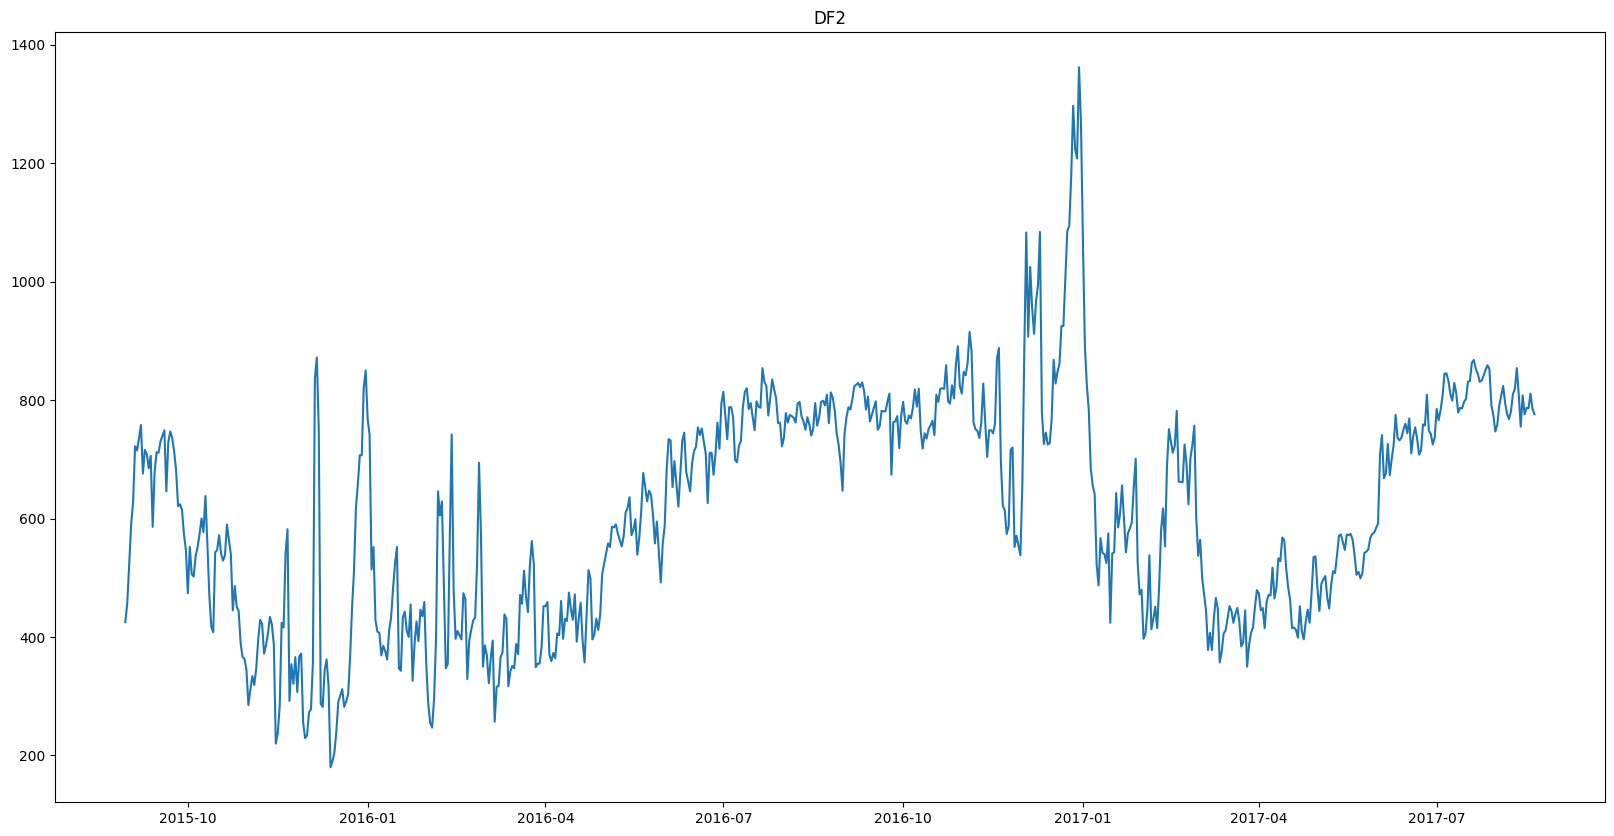

In [9]:

df2 = final_df[(final_df["datum"] >= datetime(2015,8,30)) &  (final_df["datum"] <= datetime(2017,8,20))]
df2.index = df2["datum"]
print(df2.head())
plt.figure(figsize = (20,10))
plt.plot(df2["datum"], df2["broj_gostiju"])
plt.title("DF2")

In [16]:
from statsmodels.tsa.arima.model import ARIMA
train = df2.iloc[:-50]
test = df2.iloc[-50:]
del test["datum"]


Text(0.5, 1.0, 'test')

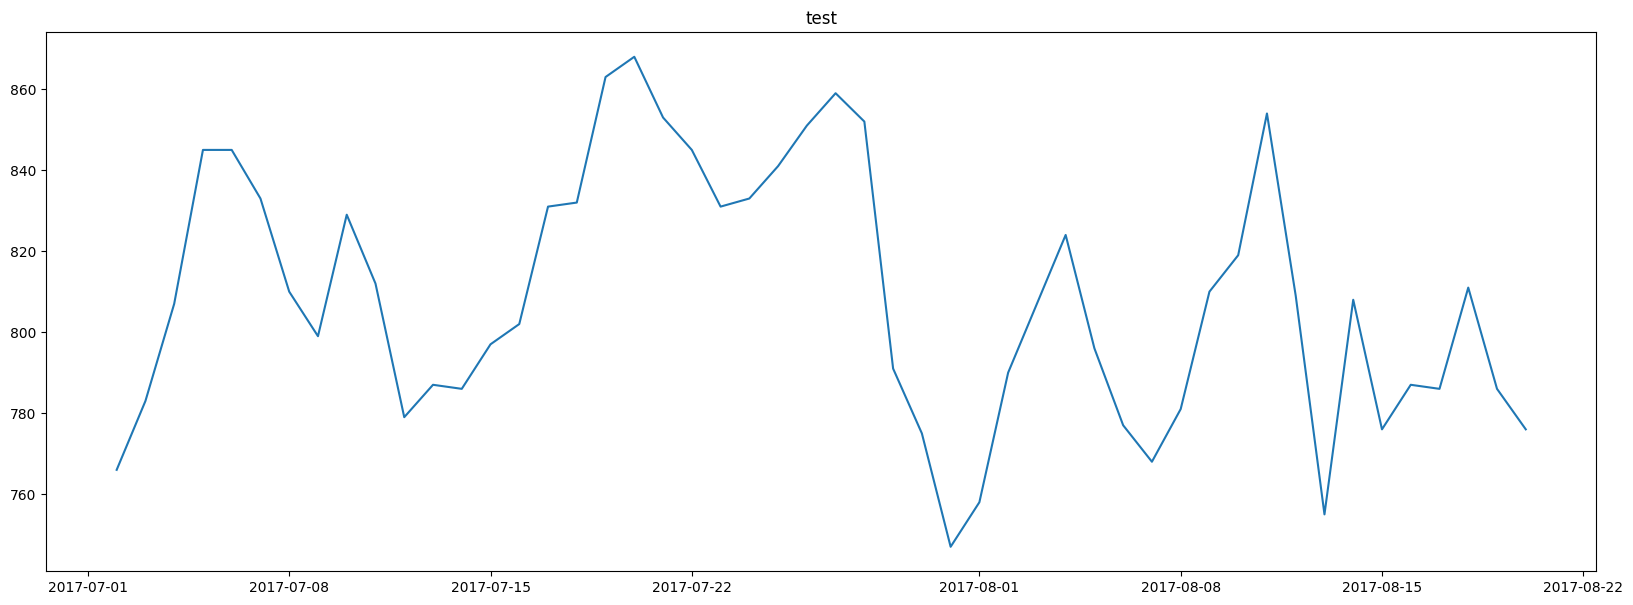

In [17]:
plt.figure(figsize=(20, 7))
plt.plot(test.index,test["broj_gostiju"])
plt.title("test")
#del train["datum"]

Text(0.5, 1.0, 'train')

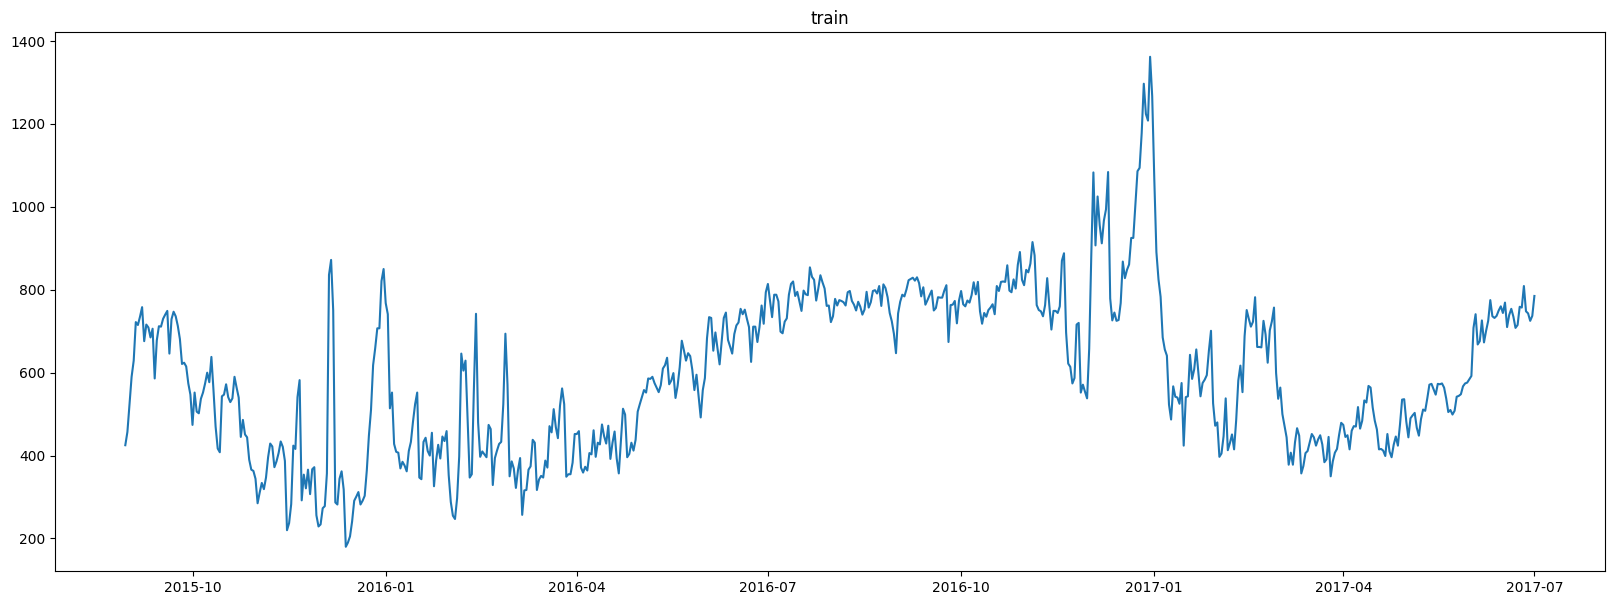

In [18]:
plt.figure(figsize=(20, 7))
plt.plot(train["datum"],train["broj_gostiju"])
plt.title("train")

            datum  broj_gostiju
datum                          
2015-08-31 1 days          32.0
2015-09-01 1 days          66.0
2015-09-02 1 days          67.0
2015-09-03 1 days          39.0
2015-09-04 1 days          93.0
...           ...           ...
2017-06-27 1 days         -61.0
2017-06-28 1 days          -5.0
2017-06-29 1 days         -18.0
2017-06-30 1 days          12.0
2017-07-01 1 days          48.0

[671 rows x 2 columns]


Text(0.5, 1.0, 'train diff')

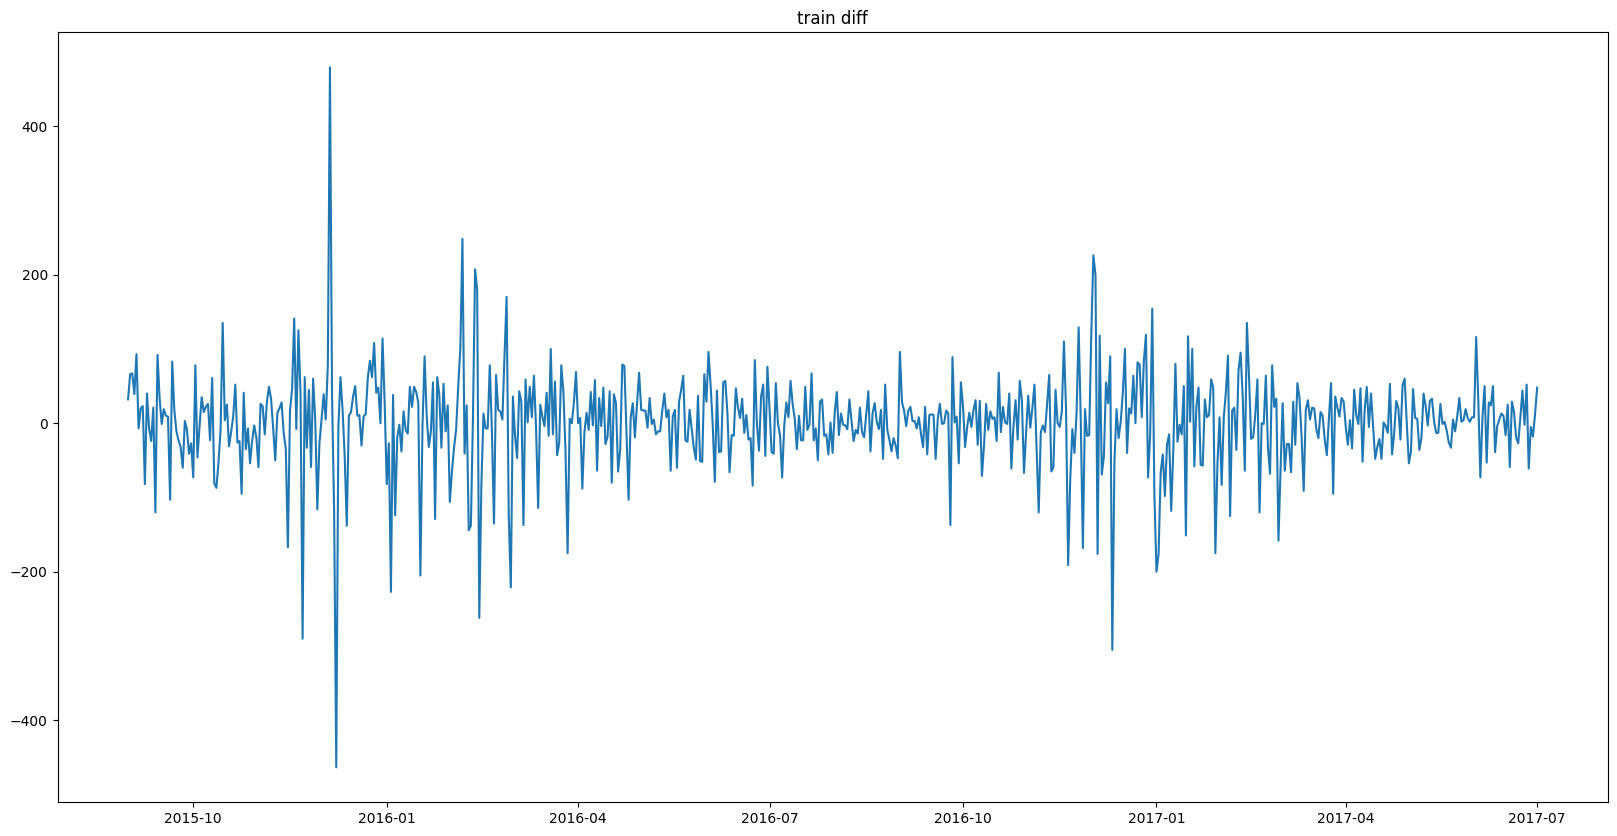

In [19]:
train_diff = train.diff().dropna()
print(train_diff)
plt.figure(figsize = (20,10))
plt.plot(train_diff.index, train_diff["broj_gostiju"])
plt.title("train diff")

In [20]:
result = adfuller(train_diff["broj_gostiju"])
# Ispis rezultata
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretacija rezultata
if result[1] < 0.05:
    print("\nSerija je stacionarna.")
else:
    print("\nSerija nije stacionarna i treba je diferencirati")

ADF Statistic: -7.7570263728904605
p-value: 9.676362876452147e-12
Critical Values:
   1%: -3.4404504809576695
   5%: -2.8659967824852073
   10%: -2.569143417751479

Serija je stacionarna.


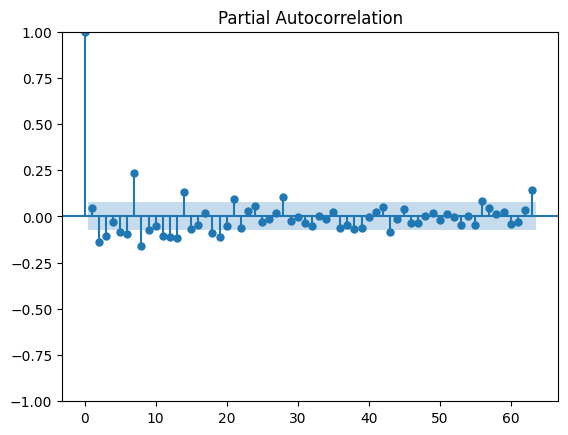

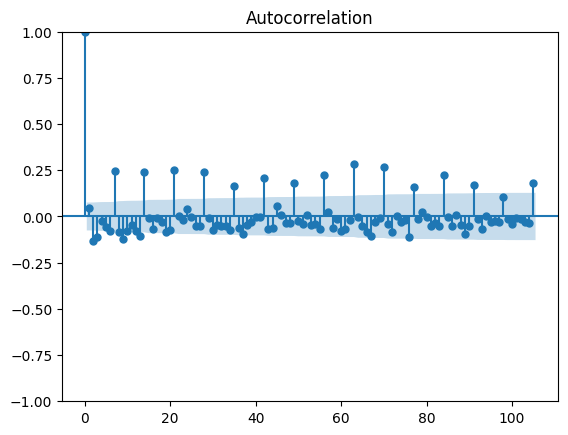

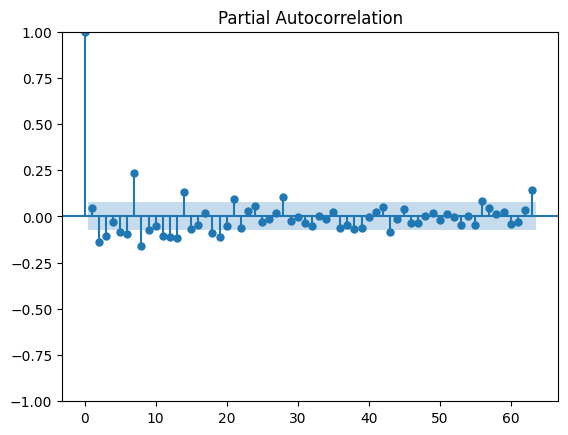

In [21]:
plot_acf(train_diff["broj_gostiju"], lags=105)
plot_pacf(train_diff["broj_gostiju"], lags=63)

In [22]:
model = auto_arima(train['broj_gostiju'], seasonal = True, trace = True, approx = False, m = 7, stacionary = False, start_P = 0, max_P = 15, start_Q = 0, max_Q = 15, start_p = 0, max_p = 15, max_q = 15 )
model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(0,0,0)[7] intercept   : AIC=7513.898, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=7523.341, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=7479.593, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=7491.598, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=7521.386, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=7524.064, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=7455.207, Time=0.48 sec
 ARIMA(1,1,0)(3,0,0)[7] intercept   : AIC=7436.713, Time=1.18 sec
 ARIMA(1,1,0)(4,0,0)[7] intercept   : AIC=7427.032, Time=2.53 sec
 ARIMA(1,1,0)(5,0,0)[7] intercept   : AIC=7427.991, Time=5.84 sec
 ARIMA(1,1,0)(4,0,1)[7] intercept   : AIC=inf, Time=12.55 sec
 ARIMA(1,1,0)(3,0,1)[7] intercept   : AIC=inf, Time=6.84 sec
 ARIMA(1,1,0)(5,0,1)[7] intercept   : AIC=inf, Time=21.46 sec
 ARIMA(0,1,0)(4,0,0)[7] intercept   : AIC=7432.305, Time=3.00 sec
 ARIMA(2,1,0)(4,0,0)[7] intercept   : AIC=7420

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  672
Model:             SARIMAX(2, 1, 1)x(4, 0, [], 7)   Log Likelihood               -3684.893
Date:                            Tue, 16 Apr 2024   AIC                           7385.785
Time:                                    11:33:58   BIC                           7421.855
Sample:                                08-30-2015   HQIC                          7399.756
                                     - 07-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0442      0.033     31.236      0.000       0.979       1.110
ar.L2         -0.1763      0.031     -5.646      0.000      -0.237      -0.115
ma.L1         -0.9895      0.007   -134.106      0.000      -1.004      -0.975
ar.S.L7        0.1891      0.030      6.207      0.000       0.129       0.249
ar.S.L14       0.1440      0.035      4.080      0.000       0.075       0.213
ar.S.L21       0.1529      0.035      4.375      0.000       0.084       0.221
ar.S.L28       0.1246      0.037      3.374      0.001       0.052       0.197
sigma2      3433.4150     99.792     34.406      0.000    3237.826    3629.004
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              2344.52
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                            -0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
mod = ARIMA(train['broj_gostiju'], order = (2,1,1), seasonal_order = ([1,2,4,5,8],0,[2],7))
mod = mod.fit()
mod.summary()

/opt/anaconda3/envs/dataSci/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dataSci/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dataSci/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/dataSci/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            SARIMAX Results                                            
=======================================================================================================
Dep. Variable:                                    broj_gostiju   No. Observations:                  672
Model:             ARIMA(2, 1, 1)x([1, 2, 4, 5, 8], 0, [2], 7)   Log Likelihood                -206.271
Date:                                         Tue, 16 Apr 2024   AIC                            432.543
Time:                                                 11:37:43   BIC                            477.630
Sample:                                             08-30-2015   HQIC                           450.006
                                                  - 07-01-2017                                         
Covariance Type:                                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3636      0.749      0.486      0.627      -1.104       1.831
ar.L2          0.6156      0.679      0.906      0.365      -0.716       1.947
ma.L1         -0.9936      1.400     -0.710      0.478      -3.737       1.749
ar.S.L7       -1.0129      0.264     -3.839      0.000      -1.530      -0.496
ar.S.L14       0.4654      0.723      0.643      0.520      -0.952       1.883
ar.S.L28       0.9481      0.216      4.384      0.000       0.524       1.372
ar.S.L35       0.5312      0.652      0.814      0.415      -0.747       1.810
ar.S.L56       0.0682      0.127      0.538      0.591      -0.180       0.317
ma.S.L14      -0.9959      1.483     -0.672      0.502      -3.902       1.910
sigma2      3773.3123      0.000   1.17e+07      0.000    3773.312    3773.313
===================================================================================
Ljung-Box (L1) (Q):                 372.32   Jarque-Bera (JB):            268999.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            -7.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        99.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.59e+23. Standard errors may be unstable.
"""

672 721


<Axes: >

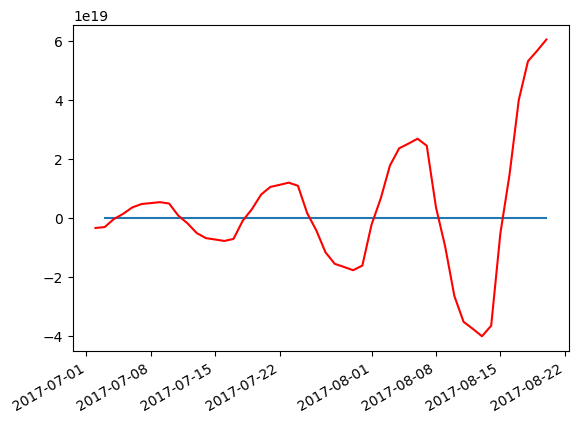

In [24]:
start = len(train)
end = len(test) + len(train) - 1
 
print(start,end)
pred = mod.predict(start = start, end = end)
#pred = train["broj_gostiju"].iloc[0] + np.cumsum(pred)
#plt.plot(pred["datum"],legend=True)

test_diff = test.diff().dropna()
plt.plot(test_diff.index, test_diff["broj_gostiju"])
pred.plot(color = "red")

In [25]:
#racunanje greske modela
#rmse = root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['broj_gostiju']))
print(f"RMSE: {rmse}%")

#mape = mean apsolute percentage error 
import numpy as np
mape = np.mean(np.abs((test['broj_gostiju'] - pred) / test['broj_gostiju'])) * 100
print(f"MAPE: {mape}%")

RMSE: 2.1439155777556967e+19%
MAPE: 1.8855724286798505e+18%


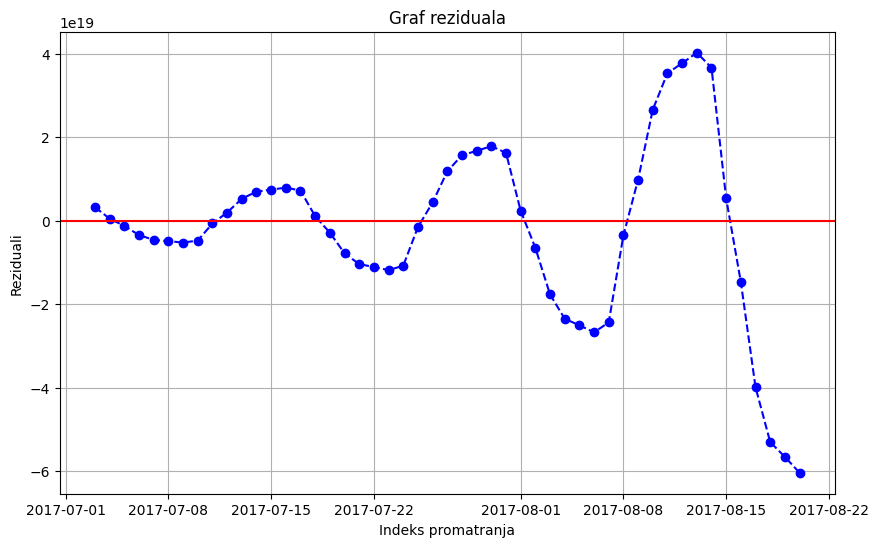

In [26]:
#racunanje residuala
reziduali = test_diff['broj_gostiju'] - pred

# Vizualizacija reziduala
plt.figure(figsize=(10, 6))  # Postavljanje veličine figure
plt.plot(reziduali, marker='o', linestyle='--', color='blue')  # Crtanje grafa reziduala
plt.title('Graf reziduala')
plt.xlabel('Indeks promatranja')
plt.ylabel('Reziduali')
plt.axhline(y=0, color='red', linestyle='-')  # Crta horizontalnu liniju na y=0 za referencu
plt.grid(True)
plt.show()